In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os
import seaborn as sns
from datetime import datetime

In [2]:
os.getcwd()

'/Users/ameyapatankar/Desktop/Git/ML in Finance'

In [3]:
df = pd.read_csv('AAPL.csv')

In [4]:
df.tail()

,Date,Open,Close,High,Low,Volume
873,24-Jun-19,198.539993,198.580002,200.160004,198.169998,18220400
874,25-Jun-19,198.429993,195.570007,199.259995,195.289993,21070300
875,26-Jun-19,197.770004,199.800003,200.990005,197.350006,26067500
876,27-Jun-19,200.289993,199.740005,201.570007,199.570007,20899700
877,28-Jun-19,198.679993,197.919998,199.500000,197.050003,31110600


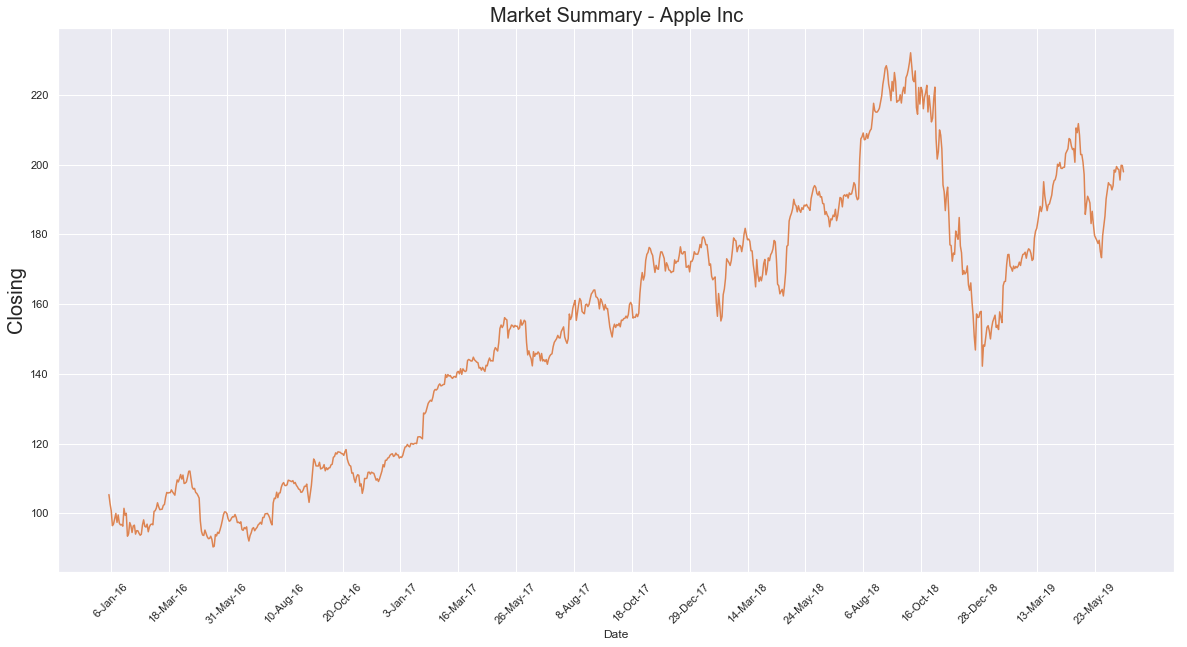

In [5]:
sns.set()
plt.figure(figsize=(20,10))
current_palette = sns.color_palette()
plt.plot(df.Date,df.Close,color = current_palette[1],label = 'Close')
_ = plt.xticks(df.Date[2::50],rotation='45')
plt.xlabel('Date')
plt.ylabel('Closing',size = 20)
_ = plt.title('Market Summary - Apple Inc',size = 20)

In [6]:
aapl_daily_returns = df['Close'].pct_change()

In [7]:
returns = aapl_daily_returns.to_frame()

In [8]:
returns['Date'] = df.Date

In [9]:
returns = returns.dropna()
returns.head(),returns.tail()

(      Close       Date
 1 -0.025059   5-Jan-16
 2 -0.019570   6-Jan-16
 3 -0.042205   7-Jan-16
 4  0.005288   8-Jan-16
 5  0.016192  11-Jan-16,         Close       Date
 873 -0.001006  24-Jun-19
 874 -0.015158  25-Jun-19
 875  0.021629  26-Jun-19
 876 -0.000300  27-Jun-19
 877 -0.009112  28-Jun-19)

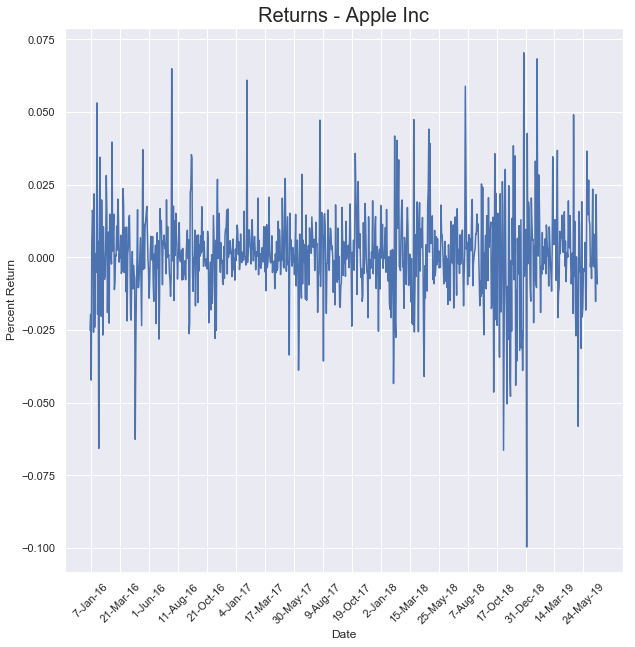

In [10]:
# sns.set()
plt.figure(figsize=(10,10))
plt.plot(returns.Date,returns.Close)
plt.xlabel('Date')
plt.ylabel('Percent Return')
_ = plt.title('Returns - Apple Inc',size=20)
_ = plt.xticks(returns.Date[2::50],rotation='45')

In [11]:
# plt.figure(figsize=(15,1))
plt.figure(figsize=(10,10))
# plot_acf(returns.Close,lags=20)
# plt.show()
plot_acf(returns.Close,lags=20)
plt.show()

plot_pacf(returns.Close,lags=20)
plt.show()




NameError: name 'plot_acf' is not defined

<Figure size 720x720 with 0 Axes>

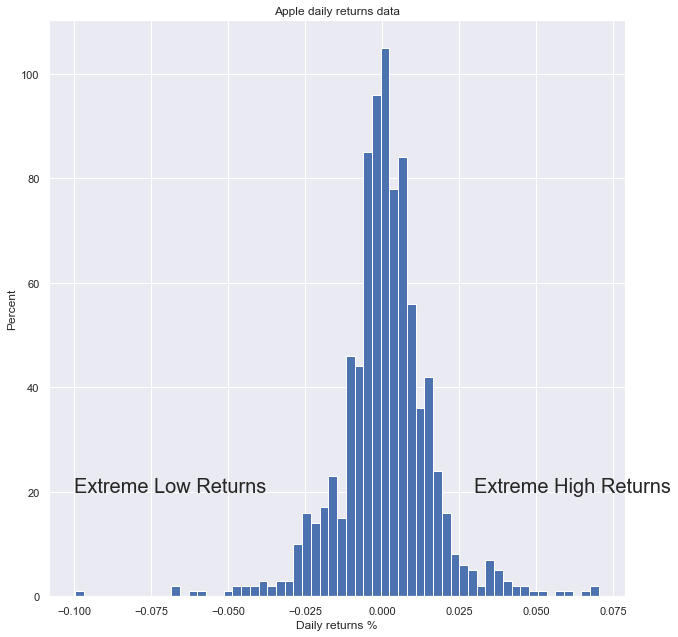

In [12]:
fig = plt.figure(figsize=(10,10))
# plt.figure(figsize=(10,10))

ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
plt.hist(returns.Close,bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Apple daily returns data")
# ax1.text(-0.1,20,"Extreme Low\nreturns")
# ax1.text(0.075,20,"Extreme High\nreturns")
plt.annotate('Extreme Low Returns',xy = (-0.1,20),size= 20)
plt.annotate('Extreme High Returns',xy = (0.03,20),size= 20)
plt.show()

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error as MSE

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [14]:
df_test = adfuller(returns['Close'], autolag='AIC')
result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)

Test Statistic                 -28.925560
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    876.000000
Critical Value (1%)             -3.437837
Critical Value (5%)             -2.864845
Critical Value (10%)            -2.568530
dtype: float64


In [15]:
returns_sqd = returns.Close**2

In [16]:
returns_sqd = returns_sqd.to_frame()
# returns_sqd=returns_sqd[:50]
returns_sqd['Date'] = returns.Date


In [17]:
df_test = adfuller(returns_sqd['Close'], autolag='AIC')
result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)

Test Statistic                  -5.113371
p-value                          0.000013
#Lags Used                      17.000000
Number of Observations Used    859.000000
Critical Value (1%)             -3.437986
Critical Value (5%)             -2.864911
Critical Value (10%)            -2.568565
dtype: float64


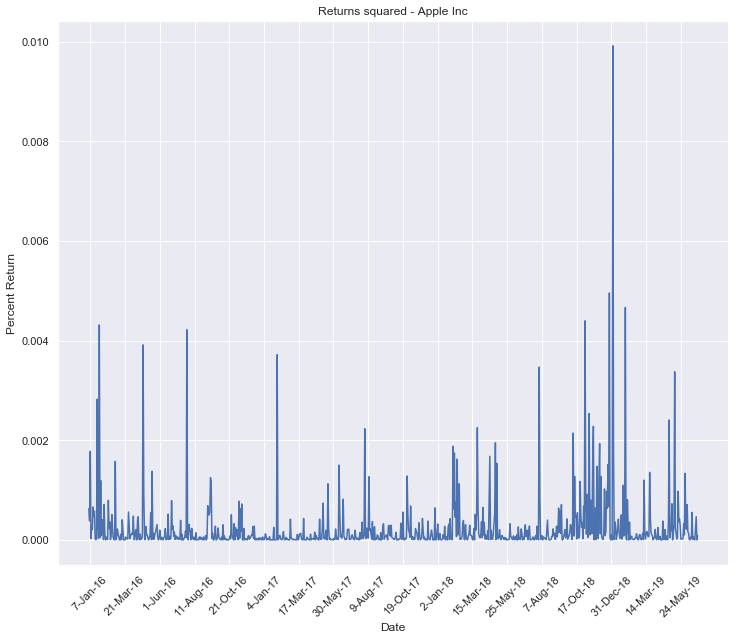

In [18]:
plt.figure(figsize=(12,10))
plt.plot(returns_sqd.Date,returns_sqd.Close)
plt.xlabel('Date')
plt.ylabel('Percent Return')
_ = plt.title('Returns squared - Apple Inc')
_ = plt.xticks(returns.Date[2::50],rotation='45')

<Figure size 720x720 with 0 Axes>

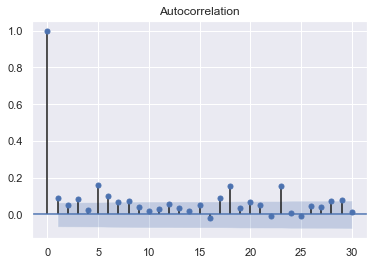

In [19]:
plt.figure(figsize=(10,10))
plot_acf(returns_sqd.Close,lags=30)
plt.show()


**GARCH MODEL**

In [20]:
from scipy.optimize import minimize

In [21]:
def GARCH(param, *args):
 "Initialize Params:"
 mu = param[0]
 omega = param[1]
 alpha = param[2]
 beta = param[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood

def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y  
        
    

In [22]:
T = 100
mu = 35;
sig = 5;
Y = np.random.normal(mu,sig,T);
param0 = np.array([35, 6, 0.3, 0.5])
param_star = minimize(GARCH, param0, method='Powell', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


In [26]:
tmp = GARCH(Y)

print(tmp)

2.724706180214148


In [27]:
param_star.x,Y[0],T

(array([108.0985756 ,  76.47173261,  -0.3854901 ,  78.55259434]),
 40.89702590235515,
 100)

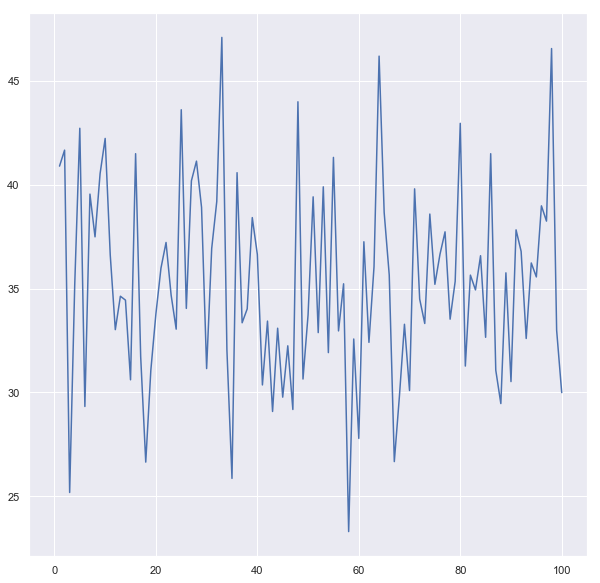

In [29]:
plt.figure(figsize=(10,10))
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')
plt.plot(Y_GARCH)


# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")